# Visualization for Data Analysis

Author: Jaehyung Kim (jaehyungkim@kaist.ac.kr)

In [1]:
import os
import easydict
import json

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pickle

from matplotlib import pyplot as plt
from MulticoreTSNE import MulticoreTSNE as TSNE

In [4]:
from src.models import load_backbone
from src.data import get_base_dataset

## Preliminary

In [3]:
_, tokenizer = load_backbone('roberta_large')

2023-06-13 13:49:31.037336: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/jaehyung/torch/install/lib:/home/jaehyung/torch/install/lib:/usr/local/cuda/lib64:/home/jaehyung/torch/install/lib:/home/jaehyung/torch/install/lib:/usr/local/cuda/lib64:
2023-06-13 13:49:31.037390: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
In Transformers v4.0.0, the default path to cache downloaded models changed from '~/.cache/torch/transformers' to '~/.cache/huggingface/transformers'. Since you don't seem to have overridden and '~/.cache/torch/transformers' is a directory that exists, we're moving it to '~/.cache/huggingface/transformers' to avoid redownloading models you have already in the cache. You should only see this message once.
Some weig

In [6]:
dataset, _, _, _ = get_base_dataset('qnli', tokenizer, 16, 1.0, 1234)

Initializing base dataset... (name: qnli)


In [92]:
inputs_t = dataset.train_dataset[:][0][:, :].numpy() # 0: Entailment, 1: Not Entailment (QNLI)
labels_t = dataset.train_dataset[:][1][:, 0].numpy() # 0: Entailment, 1: Not Entailment (QNLI)

# Load Features

In [76]:
infoverse = np.load('./outputs/qnli_roberta_large_infoverse.npy')

In [77]:
penuls = np.load('./outputs/qnli_roberta_large_penuls.npy')
outputs = np.load('./outputs/qnli_roberta_large_logits.npy')

In [68]:
# To reduce the computational overhead, subsampling with random sampling
rand_idx = np.random.permutation(np.arange(len(infoverse)))[:1000]

In [69]:
infoverse = infoverse[rand_idx]
penuls = penuls[rand_idx]
outputs = outputs[rand_idx]
inputs_t = inputs_t[rand_idx]
labels_t = labels_t[rand_idx]

## tSNE: mapping high-dimensional features into 2-dimension

In [78]:
embeddings_penul = TSNE(n_jobs=4).fit_transform(penuls)

In [79]:
infoverse = (infoverse - infoverse.mean(axis=0)) / (1e-8 + infoverse.std(axis=0)) 
embeddings_info = TSNE(n_jobs=4).fit_transform(infoverse)

In [80]:
infoverse_0to1 = (infoverse[:, :] - infoverse[:, :].min(axis=0)) / (infoverse[:, :].max(axis=0) - infoverse[:, :].min(axis=0))  

In [81]:
embeddings_carto = infoverse[:, :2]

In [82]:
np.save('qnli_roberta_large_tsne_penul.npy', embeddings_penul)
np.save('qnli_roberta_large_tsne_info.npy', embeddings_info)

## Draw connected figures

### Tailoring each feature into same scale

In [83]:
def scale_to_1(features):
    new_features = np.zeros(features.shape)
    new_features[:, 0] = (features[:, 0] - features[:, 0].min()) / (features[:, 0].max() - features[:, 0].min())
    new_features[:, 1] = 2.0 * (features[:, 1] - features[:, 1].min()) / (features[:, 1].max() - features[:, 1].min())
    return new_features

In [84]:
new_embeddings_penul = scale_to_1(embeddings_penul)

In [85]:
new_embeddings_info = scale_to_1(embeddings_info)

In [86]:
new_embeddings_carto_bef = scale_to_1(embeddings_carto)
new_embeddings_carto = np.zeros(new_embeddings_carto_bef.shape)
new_embeddings_carto[:, 0] = new_embeddings_carto_bef[:, 1] / 2.0
new_embeddings_carto[:, 1] = new_embeddings_carto_bef[:, 0] * 2.0

### Mapping each feature

In [99]:
score_idx = 0
scores = (infoverse[:, score_idx] - infoverse[:, score_idx].min()) / (infoverse[:, score_idx].max() - infoverse[:, score_idx].min()) 

### Plot

In [20]:
import pandas as pd
import numpy as np
import os

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

font = 'Arial'
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.family'] = font
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = font
plt.rcParams['mathtext.it'] = font
plt.rcParams['mathtext.bf'] = font
plt.rcParams['axes.linewidth'] = 0.9
plt.rcParams['xtick.major.width'] = 0.9
plt.rcParams['xtick.minor.width'] = 0.9
plt.rcParams['ytick.major.width'] = 0.9
plt.rcParams['ytick.minor.width'] = 0.9
plt.rcParams['font.weight'] = 510

linewidth = 2.5

In [21]:
from matplotlib import font_manager
for i in font_manager.fontManager.ttflist:
    if 'Nanum' in i.name:
        print(i.name, i.fname)

NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareR.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareB.ttf


In [94]:
label0_idx = (labels_t == 0)
label1_idx = (labels_t == 1)

In [95]:
preds = torch.Tensor(outputs).max(1)[1]
corrects = (labels_t == preds.numpy())
corrects0 = corrects[label0_idx]
corrects1 = corrects[label1_idx]

In [96]:
correct_idx = np.where(corrects == True)[0] 
wrong_idx = np.where(corrects == False)[0]

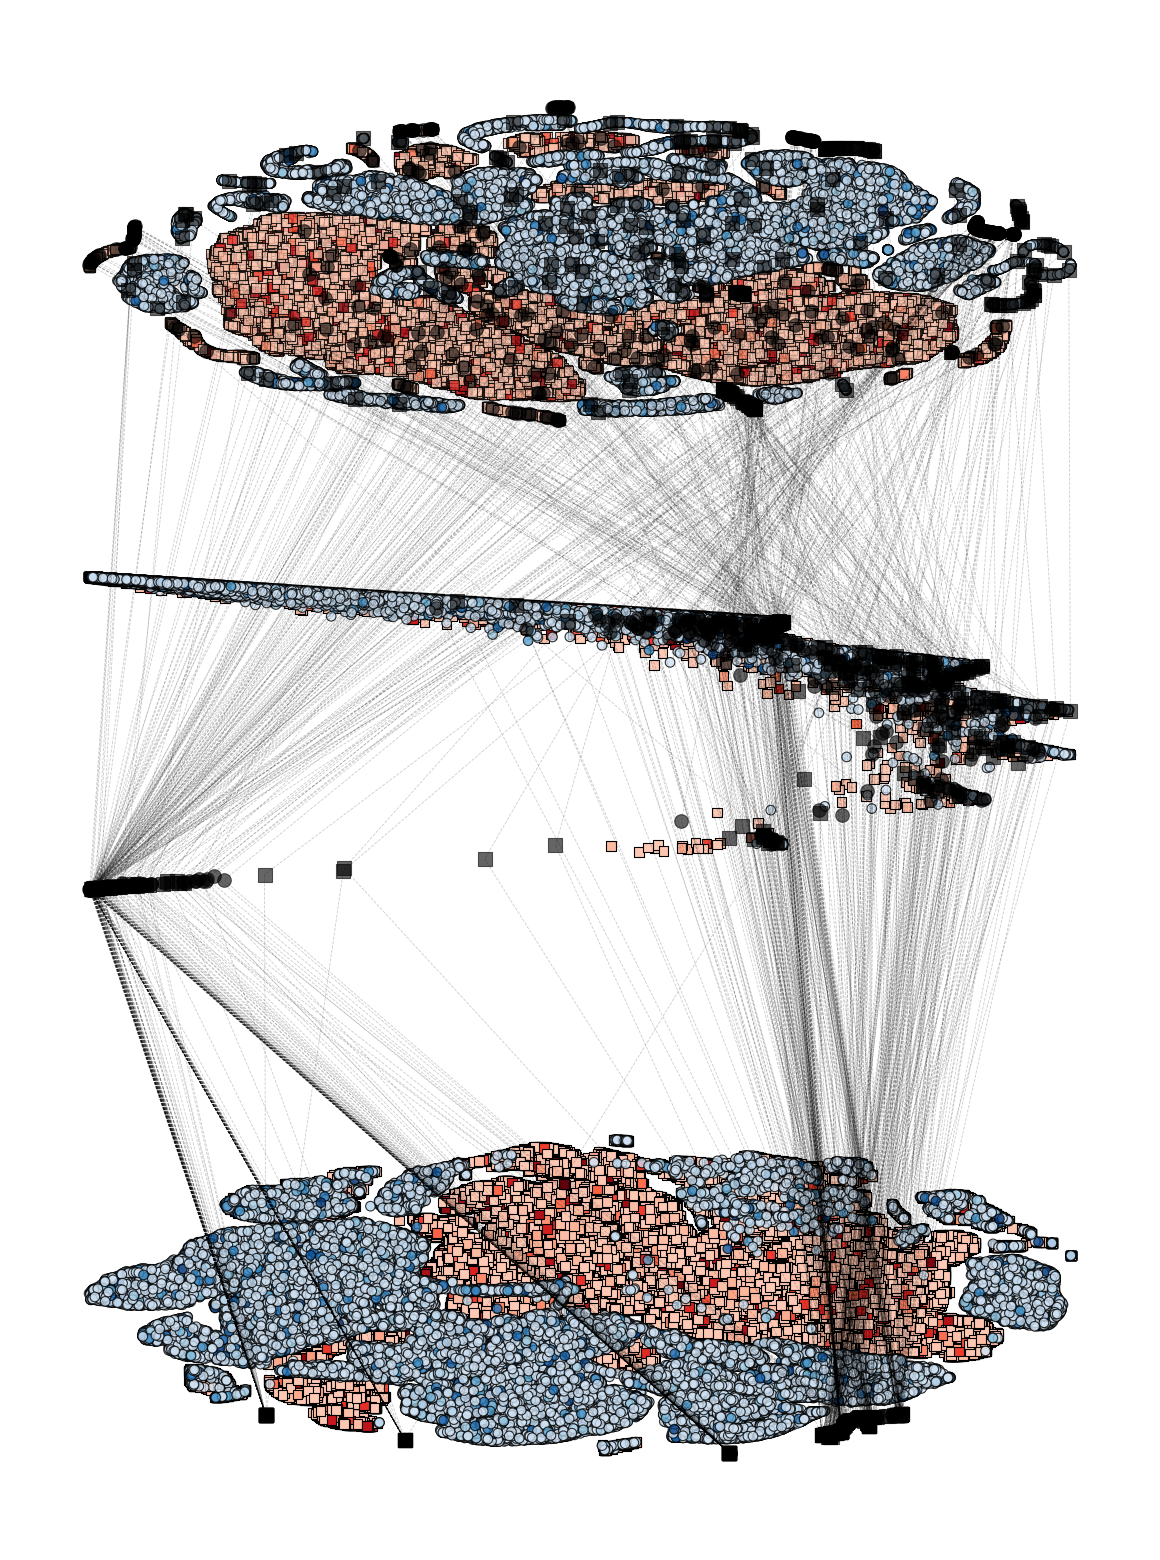

In [100]:
fig, ax = plt.subplots(1, 1, figsize=(3, 4), dpi=400)
ax.axis("off")

margin = 3.5
n_labels = len(penuls)
sub_idxs = np.concatenate([correct_idx[:], wrong_idx], axis=0)
sub_labels = labels_t[sub_idxs]
sub_scores = scores[sub_idxs]

vis_x1 = new_embeddings_penul[sub_idxs]
vis_x2 = new_embeddings_carto[sub_idxs]
vis_x3 = new_embeddings_info[sub_idxs]

label0_indices = np.where(sub_labels == 0)[0]
label1_indices = np.where(sub_labels == 1)[0]
true_indices = label0_indices

# Corrects

ax.scatter(vis_x1[label0_indices[label0_indices < len(correct_idx)], 0], vis_x1[label0_indices[label0_indices < len(correct_idx)], 1] + margin - 0.5, c= 0.2 + 0.8 * infoverse_0to1[label0_indices[label0_indices < len(correct_idx)], 1], vmin=0, cmap=plt.cm.get_cmap("Reds", 100), alpha=0.8, marker='s', s=3, linewidths=0.2, edgecolors='black')
ax.scatter(vis_x1[label1_indices[label1_indices < len(correct_idx)], 0], vis_x1[label1_indices[label1_indices < len(correct_idx)], 1] + margin - 0.5, c= 0.2 + 0.8 * infoverse_0to1[label1_indices[label1_indices < len(correct_idx)], 1], vmin=0, cmap=plt.cm.get_cmap("Blues", 100), alpha=0.8, marker='o', s=3, linewidths=0.2, edgecolors='black')
ax.scatter(vis_x1[label0_indices[label0_indices >= len(correct_idx)], 0], vis_x1[label0_indices[label0_indices >= len(correct_idx)], 1] + margin - 0.5, c='k', marker='s', s=6, linewidths=0.2, edgecolors='black', alpha=0.6)
ax.scatter(vis_x1[label1_indices[label1_indices >= len(correct_idx)], 0], vis_x1[label1_indices[label1_indices >= len(correct_idx)], 1] + margin - 0.5, c='k', marker='o', s=6, linewidths=0.2, edgecolors='black', alpha=0.6)

for k in range(len(correct_idx), len(correct_idx) + len(wrong_idx)):
    ax.plot([vis_x1[k,0], vis_x2[k,0]], [vis_x1[k,1] + margin - 0.5, vis_x2[k,1]], 'k--', linewidth=0.15, alpha=0.2)

ax.scatter(vis_x2[label0_indices[label0_indices < len(correct_idx)], 0], vis_x2[label0_indices[label0_indices < len(correct_idx)], 1] + 0, c= 0.2 + 0.8 * infoverse_0to1[label0_indices[label0_indices < len(correct_idx)], 1], vmin=0, cmap=plt.cm.get_cmap("Reds", 100), marker='s', s=3, linewidths=0.2, edgecolors='black')
ax.scatter(vis_x2[label1_indices[label1_indices < len(correct_idx)], 0], vis_x2[label1_indices[label1_indices < len(correct_idx)], 1] + 0, c= 0.2 + 0.8 * infoverse_0to1[label1_indices[label1_indices < len(correct_idx)], 1], vmin=0, cmap=plt.cm.get_cmap("Blues", 100), alpha=0.8, marker='o', s=3, linewidths=0.2, edgecolors='black')
ax.scatter(vis_x2[label0_indices[label0_indices >= len(correct_idx)], 0], vis_x2[label0_indices[label0_indices >= len(correct_idx)], 1] + 0, c='k', marker='s', s=6, linewidths=0.2, edgecolors='black', alpha=0.6)
ax.scatter(vis_x2[label1_indices[label1_indices >= len(correct_idx)], 0], vis_x2[label1_indices[label1_indices >= len(correct_idx)], 1] + 0, c='k', marker='o', s=6, linewidths=0.2, edgecolors='black', alpha=0.6)

for k in range(len(correct_idx), len(correct_idx) + len(wrong_idx)):
    ax.plot([vis_x2[k,0], vis_x3[k,0]], [vis_x2[k,1], vis_x3[k,1] - margin - 0.1], 'k--', linewidth=0.15, alpha=0.2)

ax.scatter(vis_x3[label0_indices[label0_indices < len(correct_idx)], 0], vis_x3[label0_indices[label0_indices < len(correct_idx)], 1] - margin - 0.1, c= 0.2 + 0.8 * infoverse_0to1[label0_indices[label0_indices < len(correct_idx)], 1], vmin=0, cmap=plt.cm.get_cmap("Reds", 100), marker='s', s=3, linewidths=0.2, edgecolors='black', label='Class 0 (correct)')
ax.scatter(vis_x3[label1_indices[label1_indices < len(correct_idx)], 0], vis_x3[label1_indices[label1_indices < len(correct_idx)], 1] - margin - 0.1, c= 0.2 + 0.8 * infoverse_0to1[label1_indices[label1_indices < len(correct_idx)], 1], vmin=0, cmap=plt.cm.get_cmap("Blues", 100), alpha=0.8, marker='o', s=3, linewidths=0.2, edgecolors='black', label='Class 1 (correct)')
ax.scatter(vis_x3[label0_indices[label0_indices >= len(correct_idx)], 0], vis_x3[label0_indices[label0_indices >= len(correct_idx)], 1] - margin - 0.1, c='k', marker='s', s=6, linewidths=0.2, edgecolors='black', alpha=0.6, label='Class 1 (wrong)')
ax.scatter(vis_x3[label1_indices[label1_indices >= len(correct_idx)], 0], vis_x3[label1_indices[label1_indices >= len(correct_idx)], 1] - margin - 0.1, c='k', marker='o', s=6, linewidths=0.2, edgecolors='black', alpha=0.6, label='Class 1 (wrong)')

ax.grid(alpha=0.1, linestyle=':', linewidth=0.25)

ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()

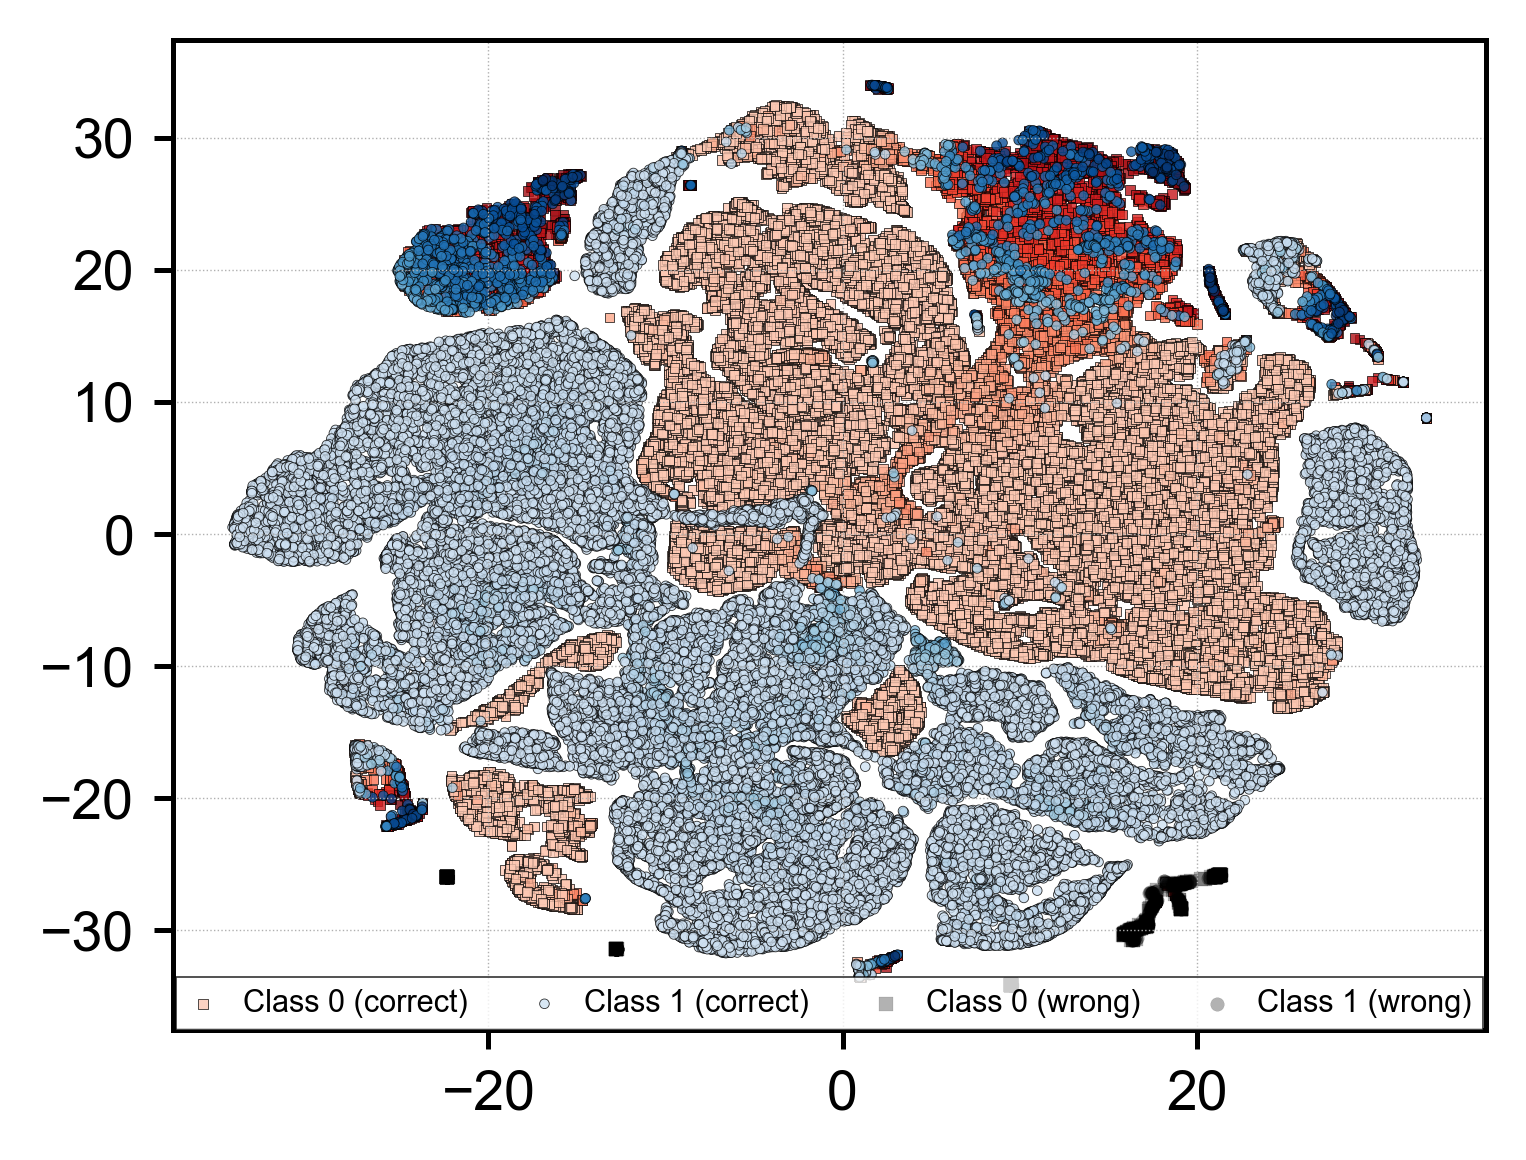

In [101]:
fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi=400)
#ax.axis("off")

n_labels = len(penuls)
vis_x1 = embeddings_info

ax.scatter(vis_x1[((0 + label0_idx) * (corrects)).nonzero(), 0], vis_x1[((0 + label0_idx) * (corrects)).nonzero(), 1], c= 0.2 + 0.8 * infoverse_0to1[((0 + label0_idx) * (corrects)).nonzero(), 1], vmin=0, cmap=plt.cm.get_cmap("Reds", 100), alpha=0.8, marker='s', s=3, linewidths=0.15, edgecolors='black', label='Class 0 (correct)')
ax.scatter(vis_x1[((0 + label1_idx) * (corrects)).nonzero(), 0], vis_x1[((0 + label1_idx) * (corrects)).nonzero(), 1], c= 0.2 + 0.8 * infoverse_0to1[((0 + label1_idx) * (corrects)).nonzero(), 1], vmin=0, cmap=plt.cm.get_cmap("Blues", 100), alpha=0.8, marker='o', s=3, linewidths=0.15, edgecolors='black', label='Class 1 (correct)')
ax.scatter(vis_x1[((0 + label0_idx) * (1 - corrects)).nonzero(), 0], vis_x1[((0 + label0_idx) * (1 - corrects)).nonzero(), 1], c='k', alpha=0.3, marker='s', s=6, linewidths=0.05, edgecolors='black', label='Class 0 (wrong)')
ax.scatter(vis_x1[((0 + label1_idx) * (1 - corrects)).nonzero(), 0], vis_x1[((0 + label1_idx) * (1 - corrects)).nonzero(), 1], c='k', alpha=0.3, marker='o', s=6, linewidths=0.05, edgecolors='black', label='Class 1 (wrong)')

ax.grid(alpha=1.0, linestyle=':', linewidth=0.25)

# Legend
leg = ax.legend(loc='lower center', ncol=4, fancybox=False, fontsize=5.52, edgecolor='black', borderaxespad=0.0, handlelength=1.0)
leg.get_frame().set_linewidth(0.3)

plt.tight_layout()

## Exporting HTML files with infoVerse

In [51]:
from bokeh.plotting import figure, show, output_notebook, output_file
from bokeh.models import HoverTool
from bokeh.models import CategoricalColorMapper
from bokeh.models import ColumnDataSource

In [102]:
output_file("qnli_0to1_norm.html")

In [103]:
score = (infoverse - infoverse.min(axis=0)) / (infoverse.max(axis=0) - infoverse.min(axis=0))

In [104]:
sentence = []
n_tokens = (inputs_t != 1).sum(axis=1)

for i in range(len(inputs_t)):
    n_tokens_i = int(n_tokens[i])
    
    sent_i = tokenizer.decode(inputs_t[i, 1:n_tokens_i-1])
    sentence.append(sent_i)

In [105]:
raw_label = []

for i in range(len(labels_t)):
    label = int(labels_t[i])
    if label == 0:
        raw_label.append('Entailment')
    else:
        raw_label.append('Not Entailment')

In [114]:
pseudo_label = outputs.argmax(axis=-1)

In [117]:
corrects = (labels_t == pseudo_label)

In [120]:
from bokeh.layouts import row, column, gridplot
from bokeh.models import CustomJS, Circle, ColumnDataSource, Slider, LinearColorMapper, ColorBar, TapTool, HoverTool
from bokeh.transform import linear_cmap, transform

# Preliminary
raw_sentence = sentence
raw_label = raw_label
label = labels_t

x_penul = list(embeddings_penul[:, 0])
y_penul = list(embeddings_penul[:, 1])

x = list(embeddings_info[:, 0])
y = list(embeddings_info[:, 1])

c = label
v0 = list(score[:, 0])
v1 = list(score[:, 1])
v2 = list(score[:, 2])
v3 = list(score[:, 3])
v4 = list(score[:, 4])
v5 = list(score[:, 5])
v6 = list(score[:, 6])
v7 = list(score[:, 7])
v8 = list(score[:, 8])
v9 = list(score[:, 9])
v10 = list(score[:, 10])
v11 = list(score[:, 11])
v12 = list(score[:, 12])
v13 = list(score[:, 13])
v14 = list(score[:, 14])
v15 = list(score[:, 15])
v16 = list(score[:, 16])
v17 = list(score[:, 17])
v18 = list(score[:, 18])
v19 = list(score[:, 19])
v20 = list(score[:, 20])
v21 = list(score[:, 21])
v22 = list(score[:, 22])

source = ColumnDataSource(data=dict(sent=raw_sentence, raw_label=raw_label, l=label, p=pseudo_label, correc=corrects, 
                                    x=x, y=y, x_penul=x_penul, y_penul=y_penul, c=c, v0=v0, v1=v1, v2=v2, v3=v3, 
                                    v4=v4, v5=v5, v6=v6, v7=v7, v8=v8, v9=v9,
                                    v10=v10, v11=v11, v12=v12, v13=v13, v14=v14, v15=v15, v16=v16, v17=v17,
                                    v18=v18, v19=v19, v20=v20, v21=v21, v22=v22,))
hover = HoverTool(
        tooltips=[("index", "$index"), ("(x,y)", "($x, $y)"), 
                  ("(sentence, raw_label, label, pseudo_label, corrects)", "(@sent, @raw_label, @l, @p, @correc)"),
            ("Training Dynamics (avg_conf, variab, forget, aum)", "@v0, @v1, @v2, @v3"),
            ("Ensemble (el2n, ent, bald, VAR, conf, variab)", "@v4, @v5, @v6, @v7, @v8, @v9"),
            ("MC Ensemble (el2n, ent, bald, VAR, conf, variab)", "@v10, @v11, @v12, @v13, @v14, @v15"),
            ("Single Model (knn, knn_rel, conf, ent, badge)", "@v16, @v17, @v18, @v19, @v20"),
            ("Linguistic Feature (knn_sent, mlm_roberta)", "@v21, @v22"),      
        ]
    )
tap = TapTool()

TOOLS = [hover, tap, 'box_zoom, pan, reset']
plot = figure(plot_width=800, plot_height=600, tools=TOOLS)

color_mapper = LinearColorMapper(palette="Viridis256", low=0, high=1)
renderer = plot.circle('x', 'y', source=source, fill_alpha=0.6, color=transform('c', color_mapper))

selected_circle = Circle(fill_alpha=1, fill_color="firebrick", line_color="black")
nonselected_circle = Circle(fill_alpha=0.1, fill_color="blue", line_color="white")

renderer.selection_glyph = selected_circle
renderer.nonselection_glyph = nonselected_circle

color_bar = ColorBar(color_mapper=color_mapper, label_standoff=12, location=(0,0))
plot.add_layout(color_bar, 'right')

slider0 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(True Label) 0: Entailment, 1: Contradict")
slider00 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(Correctness) 0: False, 1: True")

slider1 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(1. Training Dynamics) Average Confidence")
slider2 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(1. Training Dynamics) Variability")
slider3 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(1. Training Dynamics) Forgetting Number")
slider4 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(1. Training Dynamics) Area Under Margin")

slider5 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(2. Ensemble) EL2N score")
slider6 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(2. Ensemble) Entropy")
slider7 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(2. Ensemble) BALD")
slider8 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(2. Ensemble) VAR")
slider9 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(2. Ensemble) Average Confidence")
slider10 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(2. Ensemble) Variability")

slider11 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(3. MC Ensemble) EL2N score")
slider12 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(3. MC Ensemble) Entropy")
slider13 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(3. MC Ensemble) BALD")
slider14 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(3. MC Ensemble) VAR")
slider15 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(3. MC Ensemble) Average Confidence")
slider16 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(3. MC Ensemble) Variability")

slider17 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(4. Single Model) KNN density")
slider18 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(4. Single Model) KNN density (rel)")
slider19 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(4. Single Model) Confidence")
slider20 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(4. Single Model) Entropy")
slider21 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(4. Single Model) BADGE")

slider22 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(5. Linguistic fearture) KNN density (sent-bert)")
slider23 = Slider(start=0.0, end=1, value=0.0, step=1.0, title="(5. Linguistic fearture) MLM_score (roberta)")

custom_js_dict = dict(source=source, slider0=slider0, slider00=slider00,
                      slider1=slider1, slider2=slider2, slider3=slider3, slider4=slider4, slider5=slider5,
                      slider6=slider6, slider7=slider7, slider8=slider8, slider9=slider9, slider10=slider10,
                      slider11=slider11, slider12=slider12, slider13=slider13, slider14=slider14, slider15=slider15,
                      slider16=slider16, slider17=slider17, slider18=slider18, slider19=slider19, slider20=slider20,
                      slider21=slider21, slider22=slider22, slider23=slider23)

update_curve = CustomJS(args=custom_js_dict, code="""
    var data = source.data;
    var f0 = slider0.value;
    var f00 = slider00.value;
    var f1 = slider1.value;
    var f2 = slider2.value;
    var f3 = slider3.value;
    var f4 = slider4.value;
    var f5 = slider5.value;
    var f6 = slider6.value;
    var f7 = slider7.value;
    var f8 = slider8.value;
    var f9 = slider9.value;
    var f10 = slider10.value;
    var f11 = slider11.value;
    var f12 = slider12.value;
    var f13 = slider13.value;
    var f14 = slider14.value;
    var f15 = slider15.value;
    var f16 = slider16.value;
    var f17 = slider17.value;
    var f18 = slider18.value;
    var f19 = slider19.value;
    var f20 = slider20.value;
    var f21 = slider21.value;
    var f22 = slider22.value;
    var f23 = slider23.value;
    
    var x = data['x']
    var y = data['y']
    var c = data['c']
    var l = data['l']
    var correc = data['correc']
    var v0 = data['v0']
    var v1 = data['v1']
    var v2 = data['v2']
    var v3 = data['v3']
    var v4 = data['v4']
    var v5 = data['v5']
    var v6 = data['v6']
    var v7 = data['v7']
    var v8 = data['v8']
    var v9 = data['v9']
    var v10 = data['v10']
    var v11 = data['v11']
    var v12 = data['v12']
    var v13 = data['v13']
    var v14 = data['v14']
    var v15 = data['v15']
    var v16 = data['v16']
    var v17 = data['v17']
    var v18 = data['v18']
    var v19 = data['v19']
    var v20 = data['v20']
    var v21 = data['v21']
    var v22 = data['v22']
    
    for (var i = 0; i < x.length; i++) {
           c[i] = f0 * l[i] + f00 * correc[i] + f1 * v0[i] + f2 * v1[i] + f3 * v2[i] + f4 * v3[i] + f5 * v4[i] + f6 * v5[i] + f7 * v6[i] + f8 * v7[i] + f9 * v8[i] + f10 * v9[i] + f11 * v10[i] + f12 * v11[i] + f13 * v12[i] + f14 * v13[i] + f15 * v14[i] + f16 * v15[i] + f17 * v16[i] + f18 * v17[i] + f19 * v18[i] + f20 * v19[i] + f21 * v20[i] + f22 * v21[i] + f23 * v22[i] 
    }
    
    source.change.emit();
""")
slider0.js_on_change('value', update_curve)
slider00.js_on_change('value', update_curve)
slider1.js_on_change('value', update_curve)
slider2.js_on_change('value', update_curve)
slider3.js_on_change('value', update_curve)
slider4.js_on_change('value', update_curve)
slider5.js_on_change('value', update_curve)
slider6.js_on_change('value', update_curve)
slider7.js_on_change('value', update_curve)
slider8.js_on_change('value', update_curve)
slider9.js_on_change('value', update_curve)
slider10.js_on_change('value', update_curve)
slider11.js_on_change('value', update_curve)
slider12.js_on_change('value', update_curve)
slider13.js_on_change('value', update_curve)
slider14.js_on_change('value', update_curve)
slider15.js_on_change('value', update_curve)
slider16.js_on_change('value', update_curve)
slider17.js_on_change('value', update_curve)
slider18.js_on_change('value', update_curve)
slider19.js_on_change('value', update_curve)
slider20.js_on_change('value', update_curve)
slider21.js_on_change('value', update_curve)
slider22.js_on_change('value', update_curve)
slider23.js_on_change('value', update_curve)

# create a new plot and share only one range
plot_penul = figure(plot_width=800, plot_height=600, tools=TOOLS)
renderer2 = plot_penul.circle('x_penul', 'y_penul', source=source, fill_alpha=0.6, color=transform('c', color_mapper))
plot_penul.add_layout(color_bar, 'right')

renderer2.selection_glyph = selected_circle
renderer2.nonselection_glyph = nonselected_circle

show(column(slider0, slider00, slider1, slider2, slider3, slider4, slider5, slider6, slider7, slider8, slider9, slider10,
            slider11, slider12, slider13, slider14, slider15, slider16, slider17, slider18, slider19, slider20,
            slider21, slider22, slider23, plot, plot_penul))